In [8]:
# Software: Website, App,
# project to Potfolio

# Iris Dataset: Flower Species

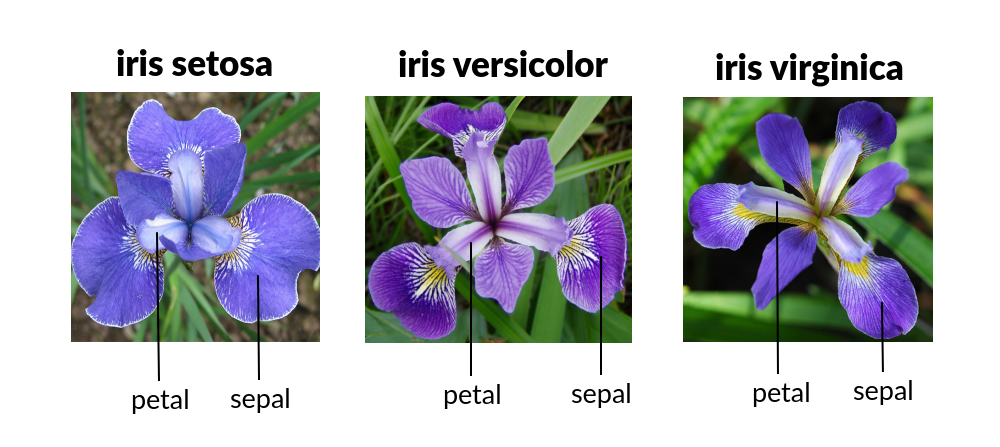

In [9]:
# How to Build Project Portfolio or Website in Python

In [10]:
# Step1: Load Important Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import datetime
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
print('All Module Loaded Successfully!!')

All Module Loaded Successfully!!


In [11]:
# Step 2:Load Extra Modules
# !pip install xgboost
# !pip install lightgbm


In [12]:
# Step 3: Load Dataset
iris_data = load_iris()
data = iris_data['data']
columns = iris_data['feature_names']
target = iris_data['target']
target_names = iris_data['target_names']

In [35]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df = pd.DataFrame(data, columns = columns)
df['target'] = target
df['target_names'] = df['target'].apply(lambda row: target_names[row])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [34]:
df.to_csv('iris.csv',index = False)
print('Done')

Done


In [14]:
# Step 4:EDA
df.size

900

In [15]:
df.shape

(150, 6)

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
df.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


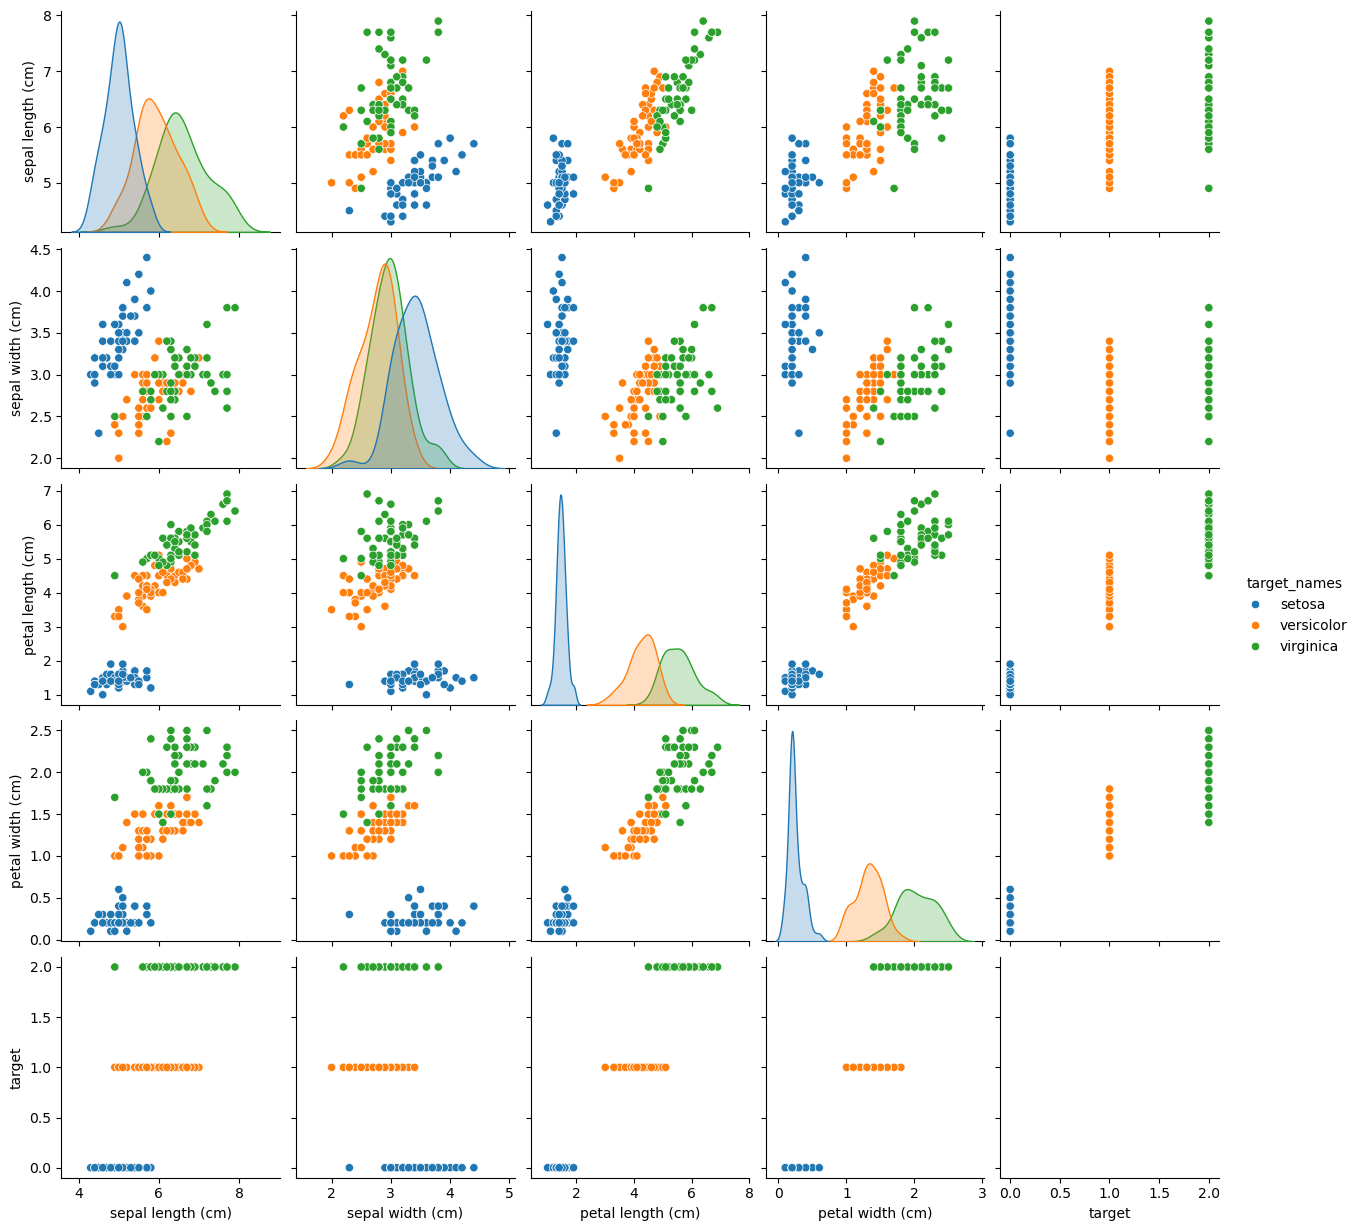

In [18]:
sns.pairplot(data = df, hue = 'target_names')
plt.show()

In [19]:
# Step 5: Divide dataset for ML
X = df.drop(['target',	'target_names'], axis = 1)
X.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
103,6.3,2.9,5.6,1.8


In [20]:
y = df['target']
y.sample()

24    0
Name: target, dtype: int64

In [ ]:
all_models = [LogisticRegression,SVC,DecisionTreeClassifier,
              RandomForestClassifier, KNeighborsClassifier, MultinomialNB,
              GradientBoostingClassifier, AdaBoostClassifier,XGBClassifier,LGBMClassifier]


all_models_names = ['LogisticRegression','SVC','DecisionTreeClassifier',
              'RandomForestClassifier', 'KNeighborsClassifier', 'MultinomialNB',
              'GradientBoostingClassifier', 'AdaBoostClassifier','XGBClassifier','LGBMClassifier']

model_compare = {'Random_State':[],
                 'Model_Name':[],
                 'Model_Training_Score':[],
                 'Model_Testing_Score':[],
                 'Model_Accuracy_Score':[],
                 'Model_Precision_Score':[],
                 'Model_Recall_Score':[],
                 'ML Model':[],
                 'Trained At':[]}

for state in range(50):
  for each_model_index in range(len(all_models_names)):
    model_name = all_models_names[each_model_index]

    print(f'Training {model_name} ML Model for STATE :{state} ')
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=state)

    if model_name == 'LGBMClassifier':
      model = all_models[each_model_index](min_child_samples=5)
    else:
      model = all_models[each_model_index]()

    model.fit(X_train,y_train)

    testing_score = model.score(X_test,y_test)
    training_score = model.score(X_train,y_train)

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test,y_pred)
    acc_score = accuracy_score(y_test,y_pred)
    pre_score = precision_score(y_test,y_pred, average= 'weighted')
    rec_score = recall_score(y_test,y_pred,average= 'weighted')

    # =============================================
    model_compare['Random_State'].append(state)
    model_compare['Model_Name'].append(model_name)
    model_compare['Model_Training_Score'].append(training_score)
    model_compare['Model_Testing_Score'].append(testing_score)
    model_compare['Model_Accuracy_Score'].append(acc_score)
    model_compare['Model_Precision_Score'].append(pre_score)
    model_compare['Model_Recall_Score'].append(rec_score)
    model_compare['ML Model'].append(model)
    model_compare['Trained At'].append(datetime.datetime.now())

    display(clear=True)




In [22]:
model_compare_df = pd.DataFrame(model_compare)
model_compare_df

,Random_State,Model_Name,Model_Training_Score,Model_Testing_Score,Model_Accuracy_Score,Model_Precision_Score,Model_Recall_Score,ML Model,Trained At
0,0,LogisticRegression,0.966667,1.000000,1.000000,1.000000,1.000000,LogisticRegression(),2026-02-23 16:53:29.461068
1,0,SVC,0.958333,1.000000,1.000000,1.000000,1.000000,SVC(),2026-02-23 16:53:29.488939
2,0,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,DecisionTreeClassifier(),2026-02-23 16:53:29.525291
3,0,RandomForestClassifier,1.000000,0.966667,0.966667,0.969048,0.966667,"(DecisionTreeClassifier(max_features='sqrt', r...",2026-02-23 16:53:30.921436
4,0,KNeighborsClassifier,0.950000,0.966667,0.966667,0.971429,0.966667,KNeighborsClassifier(),2026-02-23 16:53:31.278564
...,...,...,...,...,...,...,...,...,...
495,49,MultinomialNB,0.933333,0.966667,0.966667,0.969697,0.966667,MultinomialNB(),2026-02-23 16:55:52.651899
496,49,GradientBoostingClassifier,1.000000,0.933333,0.933333,0.933333,0.933333,([DecisionTreeRegressor(criterion='friedman_ms...,2026-02-23 16:55:53.570974
497,49,AdaBoostClassifier,1.000000,0.933333,0.933333,0.933333,0.933333,"(DecisionTreeClassifier(max_depth=1, random_st...",2026-02-23 16:55:53.983681
498,49,XGBClassifier,1.000000,0.933333,0.933333,0.933333,0.933333,"XGBClassifier(base_score=None, booster=None, c...",2026-02-23 16:55:54.125379


In [23]:
best_models_df = model_compare_df.groupby('Model_Name')[['Model_Training_Score','Model_Testing_Score']].max()
best_models_df

,Model_Training_Score,Model_Testing_Score
Model_Name,,
AdaBoostClassifier,1.000000,1.0
DecisionTreeClassifier,1.000000,1.0
GradientBoostingClassifier,1.000000,1.0
KNeighborsClassifier,0.991667,1.0
LGBMClassifier,1.000000,1.0
LogisticRegression,0.991667,1.0
MultinomialNB,0.975000,1.0
RandomForestClassifier,1.000000,1.0
SVC,0.991667,1.0


In [24]:
model_compare_df[model_compare_df['Model_Name'] == 'MultinomialNB'].sort_values(by = ('Model_Training_Score'), ascending = False)

,Random_State,Model_Name,Model_Training_Score,Model_Testing_Score,Model_Accuracy_Score,Model_Precision_Score,Model_Recall_Score,ML Model,Trained At
75,7,MultinomialNB,0.975000,0.833333,0.833333,0.850794,0.833333,MultinomialNB(),2026-02-23 16:53:54.279359
275,27,MultinomialNB,0.975000,0.933333,0.933333,0.943590,0.933333,MultinomialNB(),2026-02-23 16:54:51.214384
485,48,MultinomialNB,0.975000,0.933333,0.933333,0.944444,0.933333,MultinomialNB(),2026-02-23 16:55:50.283829
115,11,MultinomialNB,0.966667,0.966667,0.966667,0.969697,0.966667,MultinomialNB(),2026-02-23 16:54:05.511777
175,17,MultinomialNB,0.966667,0.966667,0.966667,0.969444,0.966667,MultinomialNB(),2026-02-23 16:54:25.729955
365,36,MultinomialNB,0.966667,0.966667,0.966667,0.969444,0.966667,MultinomialNB(),2026-02-23 16:55:18.202949
205,20,MultinomialNB,0.966667,0.933333,0.933333,0.943590,0.933333,MultinomialNB(),2026-02-23 16:54:33.372886
305,30,MultinomialNB,0.966667,0.900000,0.900000,0.902500,0.900000,MultinomialNB(),2026-02-23 16:54:59.603996
465,46,MultinomialNB,0.966667,0.900000,0.900000,0.902500,0.900000,MultinomialNB(),2026-02-23 16:55:44.182016
55,5,MultinomialNB,0.966667,0.933333,0.933333,0.933333,0.933333,MultinomialNB(),2026-02-23 16:53:47.510312


In [25]:
for index,i in enumerate(all_models_names):
  temp_df = model_compare_df[model_compare_df['Model_Name'] == i]
  # display(temp_df)
  final_df = temp_df[temp_df['Model_Testing_Score'] == temp_df['Model_Testing_Score'].max()]
  # display(final_df.head(1))

  final_model = final_df.iloc[0,-2]

  with open(f'{i}_best_model.pkl','wb') as f:
    pickle.dump(final_model,f)

  print(f'{index+1}. {i}_best_model.pkl Saved Successfully!!')


1. LogisticRegression_best_model.pkl Saved Successfully!!
2. SVC_best_model.pkl Saved Successfully!!
3. DecisionTreeClassifier_best_model.pkl Saved Successfully!!
4. RandomForestClassifier_best_model.pkl Saved Successfully!!
5. KNeighborsClassifier_best_model.pkl Saved Successfully!!
6. MultinomialNB_best_model.pkl Saved Successfully!!
7. GradientBoostingClassifier_best_model.pkl Saved Successfully!!
8. AdaBoostClassifier_best_model.pkl Saved Successfully!!
9. XGBClassifier_best_model.pkl Saved Successfully!!
10. LGBMClassifier_best_model.pkl Saved Successfully!!


In [26]:
# Streamlit: for ML Web-Apps Deployment

Enter value for sepal length (cm) --> range(4.3 -- 7.9):   5.5
Enter value for sepal width (cm) --> range(2.0 -- 4.4):   3.5
Enter value for petal length (cm) --> range(1.0 -- 6.9):   6.7
Enter value for petal width (cm) --> range(0.1 -- 2.5):   2.1


----------------------
Prediction of Flower Species using LogisticRegression: Species: virginica ======= Probabilty: 99.8
----------------------
Prediction of Flower Species using SVC: Species: virginica ======= Probabilty: 99.8
----------------------
Prediction of Flower Species using DecisionTreeClassifier: Species: virginica ======= Probabilty: 100.0
----------------------
Prediction of Flower Species using RandomForestClassifier: Species: virginica ======= Probabilty: 81.0
----------------------
Prediction of Flower Species using KNeighborsClassifier: Species: virginica ======= Probabilty: 100.0
----------------------
Prediction of Flower Species using MultinomialNB: Species: virginica ======= Probabilty: 55.25
----------------------
Prediction of Flower Species using GradientBoostingClassifier: Species: virginica ======= Probabilty: 99.94
----------------------
Prediction of Flower Species using AdaBoostClassifier: Species: virginica ======= Probabilty: 39.02
---------------------

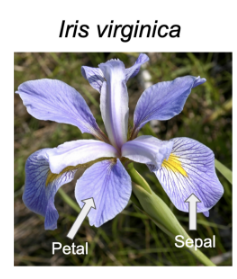

In [27]:
user_input = []
for i in X:
  min_i = X[i].min()
  max_i = X[i].max()
  ans = float(input(f'Enter value for {i} --> range({min_i} -- {max_i}):  '))
  user_input.append(ans)

final_input = [user_input]

import time

all_species = [str(i) for i in target_names]
flower_dict = dict(zip(all_species,np.zeros(len(all_species))))

for index,i in enumerate(all_models_names):
  with open(f'{i}_best_model.pkl','rb') as f:
    model = pickle.load(f)

  model_ans = model.predict(final_input)[0]

  final_flower_name = target_names[model_ans]
  flower_dict[final_flower_name] += 1
  try:
    pb = round(model.predict_proba(final_input).max()*100,2)
  except:
    pb = 1

  print('----------------------')
  print(f'Prediction of Flower Species using {i}: Species: {final_flower_name} ======= Probabilty: {pb}')
  # time.sleep(2)

print('\n'*3)
# print(flower_dict)
final_model_prediction = max(flower_dict,key = flower_dict.get)

print(f'The Final Prediction is : {final_model_prediction}')
import IPython

display(IPython.display.Image(final_model_prediction.lower()+'.png'))

In [28]:
# [A,A,A,A,B,B,A,B,C,A,A]

In [29]:
{"A":7,'B':3,'C':1}

{'A': 7, 'B': 3, 'C': 1}

In [30]:
dummy = {"A":7,'B':3,'C':1}
max(dummy,key = dummy.get)

'A'

In [32]:
# pip install streamlit

In [33]:
os.getcwd()

'C:\\Users\\salma\\ML Project Using Streamlit'